In [2]:
!pip install numpy==1.26.4
!pip install matplotlib==3.5.2

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 3.0 MB/s eta 0:00:00m eta 0:00:010:00:01m
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.0
    Uninstalling matplotlib-3.10.0:
      Successfully uninstalled matplotlib-3.10.0


In [3]:
import numpy as np
import matplotlib.pyplot as plt

<div style="text-align: center;">
  <img src="xor_def.png" width="300">
  <p style="text-color: green "'>This is image for table which store in the x and d later</p>
</div>

In [11]:
# Defining inputs and expected output (XOR truth table)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]).T  # 2x4 matrix, each column is a training example
d = np.array([0, 1, 1, 0])  # Expected output for XOR

In [13]:
X

array([[0, 0, 1, 1],
       [0, 1, 0, 1]])

In [26]:
def initialize_network_parameters():
    # Network parameters
    inputSize = 2      # Number of input neurons (x1, x2)
    hiddenSize = 2     # Number of hidden neurons
    outputSize = 1     # Number of output neurons
    lr = 0.01           # Learning rate
    epochs = 1000000    # Number of training epochs

    # Initialize weights and biases randomly within the range [-1, 1]
    w1 = np.random.rand(hiddenSize, inputSize) * 2 - 1  # Weights from input to hidden layer
    b1 = np.random.rand(hiddenSize, 1) * 2 - 1          # Bias for hidden layer
    w2 = np.random.rand(outputSize, hiddenSize) * 2 - 1 # Weights from hidden to output layer
    b2 = np.random.rand(outputSize, 1) * 2 - 1          # Bias for output layer

    return w1, b1, w2, b2, lr, epochs

In [27]:
w1, b1, w2, b2, lr, epochs = initialize_network_parameters()

In [28]:
print(w1)
print (b1)
print(w2)

[[ 0.27160759  0.08884127]
 [ 0.19980054 -0.78293637]]
[[ 0.34185966]
 [-0.78629152]]
[[0.1907696  0.15502213]]


In [29]:


# Training the network using backpropagation
error_list = []
for epoch in range(epochs):
    # Forward pass
    z1 = np.dot(w1, X) + b1  # Weighted sum for hidden layer
    a1 = 1 / (1 + np.exp(-z1))  # Sigmoid activation for hidden layer

    z2 = np.dot(w2, a1) + b2  # Weighted sum for output layer
    a2 = 1 / (1 + np.exp(-z2))  # Sigmoid activation for output layer

    # Error calculation and backpropagation
    error = d - a2  # Difference between expected and actual output
    da2 = error * (a2 * (1 - a2))  # Derivative for output layer
    dz2 = da2  # Gradient for output layer

    # Propagate error to hidden layer
    da1 = np.dot(w2.T, dz2)  # Gradient for hidden layer
    dz1 = da1 * (a1 * (1 - a1))  # Derivative for hidden layer

    # Update weights and biases
    w2 += lr * np.dot(dz2, a1.T)  # Update weights from hidden to output layer
    b2 += lr * np.sum(dz2, axis=1, keepdims=True)  # Update bias for output layer

    w1 += lr * np.dot(dz1, X.T)  # Update weights from input to hidden layer
    b1 += lr * np.sum(dz1, axis=1, keepdims=True)  # Update bias for hidden layer
    if (epoch+1)%10000 == 0:
        print("Epoch: %d, Average error: %0.05f"%(epoch, np.average(abs(error))))
        error_list.append(np.average(abs(error)))

Epoch: 9999, Average error: 0.34985
Epoch: 19999, Average error: 0.14604
Epoch: 29999, Average error: 0.07433
Epoch: 39999, Average error: 0.05180
Epoch: 49999, Average error: 0.04100
Epoch: 59999, Average error: 0.03457
Epoch: 69999, Average error: 0.03026
Epoch: 79999, Average error: 0.02714
Epoch: 89999, Average error: 0.02475
Epoch: 99999, Average error: 0.02287
Epoch: 109999, Average error: 0.02132
Epoch: 119999, Average error: 0.02004
Epoch: 129999, Average error: 0.01895
Epoch: 139999, Average error: 0.01800
Epoch: 149999, Average error: 0.01718
Epoch: 159999, Average error: 0.01645
Epoch: 169999, Average error: 0.01581
Epoch: 179999, Average error: 0.01523
Epoch: 189999, Average error: 0.01470
Epoch: 199999, Average error: 0.01422
Epoch: 209999, Average error: 0.01379
Epoch: 219999, Average error: 0.01339
Epoch: 229999, Average error: 0.01302
Epoch: 239999, Average error: 0.01268
Epoch: 249999, Average error: 0.01236
Epoch: 259999, Average error: 0.01206
Epoch: 269999, Average 

In [30]:
# Testing the trained network
z1 = np.dot(w1, X) + b1  # Weighted sum for hidden layer
a1 = 1 / (1 + np.exp(-z1))  # Sigmoid activation for hidden layer

z2 = np.dot(w2, a1) + b2  # Weighted sum for output layer
a2 = 1 / (1 + np.exp(-z2))  # Sigmoid activation for output layer

# Print results
print('Final output after training:', a2)
print('Ground truth', d)
print('Error after training:', error)
print('Average error: %0.05f'%np.average(abs(error)))

Final output after training: [[2.59337704e-04 6.24532895e-03 6.31461475e-03 9.90778842e-01]]
Ground truth [0 0 0 1]
Error after training: [[-0.00025934 -0.00624533 -0.00631462  0.00922116]]
Average error: 0.00551


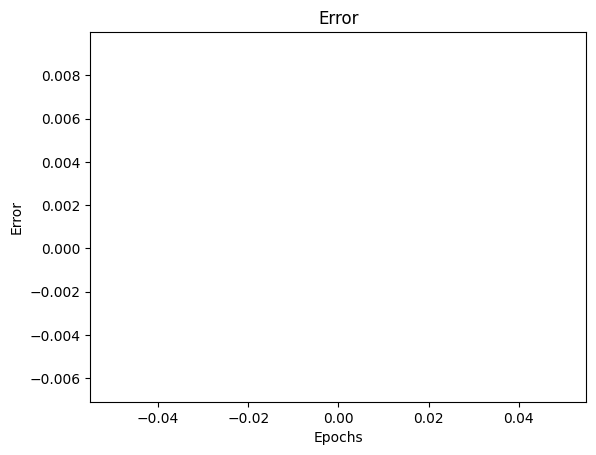

In [35]:
error_list=[]
error_list.append(np.array(error[0]))
plt.plot(error_list)
plt.title('Error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()


Final output after training: [[0.05117848 0.23991888 0.2012919  0.59478837]]
Ground truth [0 0 0 1]
Error after training: [[-0.05130124 -0.24009847 -0.20140882  0.40556638]]
Average error: 0.22459


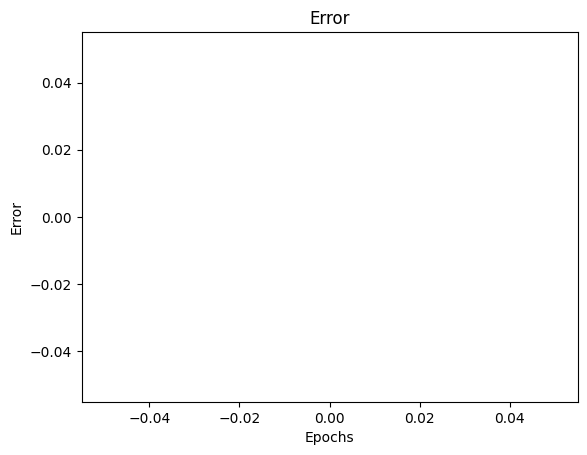

In [25]:




X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]).T  # 2x4 matrix, each column is a training example
d = np.array([0, 0, 0, 1])  # Expected output for AND

# Get initialized parameters
w1, b1, w2, b2, lr, epochs = initialize_network_parameters()

# Training the network using backpropagation
error_list = []
for epoch in range(epochs):
    # Forward pass
    z1 = np.dot(w1, X) + b1  # Weighted sum for hidden layer
    a1 = 1 / (1 + np.exp(-z1))  # Sigmoid activation for hidden layer

    z2 = np.dot(w2, a1) + b2  # Weighted sum for output layer
    a2 = 1 / (1 + np.exp(-z2))  # Sigmoid activation for output layer

    # Error calculation and backpropagation
    error = d - a2  # Difference between expected and actual output
    da2 = error * (a2 * (1 - a2))  # Derivative for output layer
    dz2 = da2  # Gradient for output layer

    # Propagate error to hidden layer
    da1 = np.dot(w2.T, dz2)  # Gradient for hidden layer
    dz1 = da1 * (a1 * (1 - a1))  # Derivative for hidden layer

    # Update weights and biases
    w2 += lr * np.dot(dz2, a1.T)  # Update weights from hidden to output layer
    b2 += lr * np.sum(dz2, axis=1, keepdims=True)  # Update bias for output layer

    w1 += lr * np.dot(dz1, X.T)  # Update weights from input to hidden layer
    b1 += lr * np.sum(dz1, axis=1, keepdims=True)  # Update bias for hidden layer
    if (epoch+1)%10000 == 0:
        print("Epoch: %d, Average error: %0.05f"%(epoch, np.average(abs(error))))
        error_list.append(np.average(abs(error)))


# Testing the trained network
z1 = np.dot(w1, X) + b1  # Weighted sum for hidden layer
a1 = 1 / (1 + np.exp(-z1))  # Sigmoid activation for hidden layer

z2 = np.dot(w2, a1) + b2  # Weighted sum for output layer
a2 = 1 / (1 + np.exp(-z2))  # Sigmoid activation for output layer

# Print results
print('\nFinal output after training:', a2)
print('Ground truth', d)
print('Error after training:', error)
print('Average error: %0.05f'%np.average(abs(error)))

# Plot error
plt.plot(error_list)
plt.title('Error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()


